PROJECT UJIAN AKHIR SEMESTER GENAP MATA KULIAH MODERN PREDICTION AND MACHINE LEARNING

Nama    : Sri Wahyuni

NIM     : 23611068

Saya menggunakan data "Predict Restaurant Menu Items Profitability"

Dataset ini berisi informasi tentang menu restoran dan profitabilitas setiap item menu. Dataset ini penting untuk menganalisis dan mengoptimalkan profitabilitas item menu di restoran. Saya memilih dataset ini karena langsung relevan dengan hipotesis yang saya ajukan. Dengan fitur-fitur seperti Harga, MenuCategory, dan Profitabilitas, dataset ini memungkinkan saya untuk menganalisis dan memprediksi faktor-faktor yang mempengaruhi keuntungan suatu menu restoran. Hal ini akan memberikan wawasan yang berguna bagi pengelola restoran dalam mengoptimalkan menu mereka agar lebih menguntungkan.

Fitur-fitur Dataset:

- RestaurantID: ID restoran.

- MenuCategory: kategori menu (contoh: Beverages, Appetizers, dsb.).

- MenuItem: nama item menu (contoh: Soda, Spinach Artichoke Dip, dsb.).

- Ingredients: daftar bahan yang digunakan dalam menu.

- Price: harga item menu.

- Profitability: Profit yang didapatkan dalam bentuk Low, Medium, dan High.

Eksplorasi Dataset (EDA):

In [21]:
import pandas as pd

# Memuat dataset
data = pd.read_csv("C:\\Users\\HP\\Documents\\Semester 4\\MPML\\UAS\\restaurant_menu_optimization_data.csv")

# Tampilkan beberapa baris pertama dari dataset
print(data.head())

  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


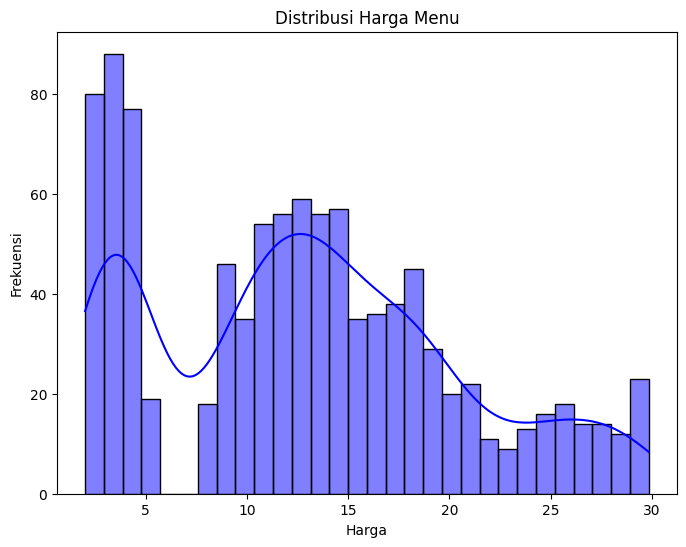

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Harga Menu (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Menu')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


Distribusi harga menu pada histogram di atas menunjukkan bagaimana harga-harga item menu tersebar di restoran. Sebagian besar item menu memiliki harga pada rentang tertentu (misal, harga rendah hingga menengah), yang ditunjukkan oleh puncak frekuensi pada rentang tersebut. Jika histogram condong ke kiri, berarti mayoritas menu berharga rendah; jika condong ke kanan, berarti lebih banyak menu berharga tinggi. Adanya outlier atau harga yang sangat tinggi/ rendah juga dapat terlihat dari ekor distribusi. Informasi ini penting untuk memahami strategi penetapan harga dan segmentasi menu restoran.

C:\Users\HP\AppData\Local\Temp\ipykernel_6376\2360081696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Profitability', palette='viridis')


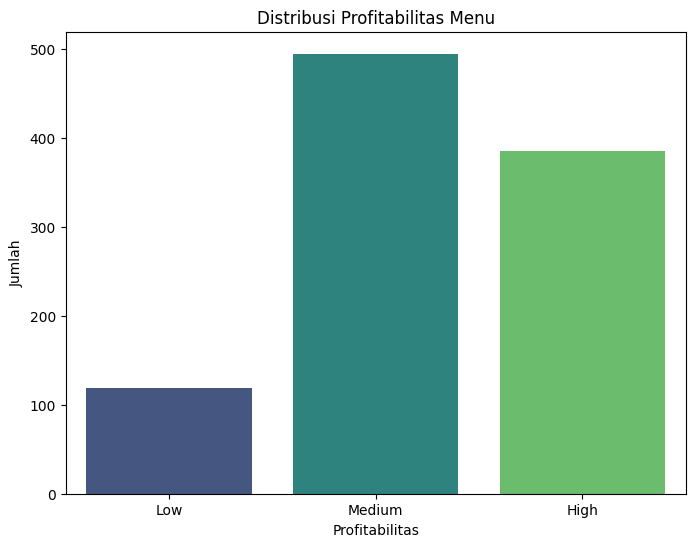

In [3]:
# Distribusi Profitabilitas (Barplot)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Profitability', palette='viridis')
plt.title('Distribusi Profitabilitas Menu')
plt.xlabel('Profitabilitas')
plt.ylabel('Jumlah')
plt.show()

Distribusi profitabilitas menu pada barplot menunjukkan jumlah item menu di setiap kategori profitabilitas (misal: rendah, sedang, tinggi). Jika satu kategori profitabilitas mendominasi, berarti sebagian besar menu restoran berada pada tingkat profitabilitas tersebut. Distribusi yang seimbang antar kategori menunjukkan variasi profitabilitas yang baik di menu restoran. Adanya kategori dengan jumlah sangat sedikit dapat menjadi perhatian untuk evaluasi dan pengembangan menu agar lebih menguntungkan. Analisis ini membantu restoran dalam mengidentifikasi menu yang kurang menguntungkan dan mengoptimalkan strategi penjualan.

C:\Users\HP\AppData\Local\Temp\ipykernel_6376\3852649032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Profitability', y='Price', palette='coolwarm')


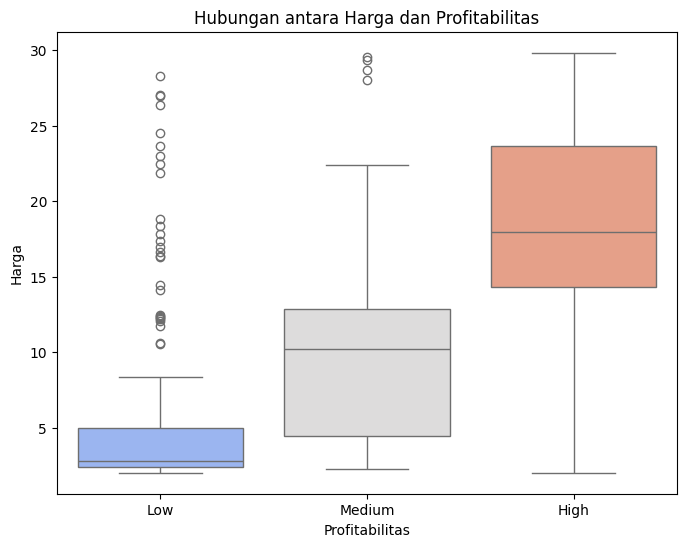

In [4]:
# Hubungan antara Fitur dan Target (Boxplot antara Price dan Profitability)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Profitability', y='Price', palette='coolwarm')
plt.title('Hubungan antara Harga dan Profitabilitas')
plt.xlabel('Profitabilitas')
plt.ylabel('Harga')
plt.show()

Hipotesis:
"Harga menu dan kategori menu memiliki pengaruh signifikan terhadap profitabilitas suatu item menu."

Saya memilih hipotesis ini karena harga dan kategori menu adalah dua faktor yang dapat secara langsung mempengaruhi seberapa menguntungkan suatu menu bagi restoran. Misalnya, makanan dengan harga tinggi mungkin lebih menguntungkan dibandingkan makanan dengan harga rendah, dan kategori tertentu (seperti menu utama) bisa lebih menguntungkan dibandingkan minuman.

PREPROCESSING DATA

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Menghitung jumlah bahan dalam kolom Ingredients
data['Ingredients_count'] = data['Ingredients'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['Ingredients', 'RestaurantID'])

# Menangani Kolom Kategorikal dengan One-Hot Encoding untuk MenuCategory dan MenuItem
data_encoded = pd.get_dummies(data, columns=['MenuCategory', 'MenuItem'], drop_first=True)

# Menangani Kolom Profitability dengan Label Encoding (mengubah Low, Medium, High menjadi angka)
label_encoder = LabelEncoder()
data_encoded['Profitability'] = label_encoder.fit_transform(data_encoded['Profitability'])

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata (misalnya, Price)
data_encoded['Price'].fillna(data_encoded['Price'].mean(), inplace=True)

# Memeriksa apakah ada nilai yang hilang
print("Jumlah nilai yang hilang per kolom:")
print(data_encoded.isnull().sum())

Jumlah nilai yang hilang per kolom:
Price                             0
Profitability                     0
Ingredients_count                 0
MenuCategory_Beverages            0
MenuCategory_Desserts             0
MenuCategory_Main Course          0
MenuItem_Caprese Salad            0
MenuItem_Chicken Alfredo          0
MenuItem_Chocolate Lava Cake      0
MenuItem_Coffee                   0
MenuItem_Fruit Tart               0
MenuItem_Grilled Steak            0
MenuItem_Iced Tea                 0
MenuItem_Lemonade                 0
MenuItem_New York Cheesecake      0
MenuItem_Shrimp Scampi            0
MenuItem_Soda                     0
MenuItem_Spinach Artichoke Dip    0
MenuItem_Stuffed Mushrooms        0
MenuItem_Tiramisu                 0
MenuItem_Vegetable Stir-Fry       0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_6376\4123555588.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Price'].fillna(data_encoded['Price'].mean(), inplace=True)


In [23]:
from sklearn.model_selection import train_test_split

# Normalisasi Fitur Numerik (Price dan Ingredients_count)
numerical_features = ['Price', 'Ingredients_count']
scaler = StandardScaler()

# Normalisasi fitur numerik
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Memisahkan fitur dan target
X = data_encoded.drop('Profitability', axis=1)  # Semua kolom selain Profitability
y = data_encoded['Profitability']  # Target variabel

# Pembagian data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset training dan testing
print("Ukuran dataset:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Ukuran dataset:
Training set: (800, 20)
Testing set: (200, 20)


K-NEAREST NEIGHBORS (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluasi KNN
print("KNN Model Evaluation:")
print(classification_report(y_test, knn_pred))

KNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.81      0.52      0.63        25
           2       0.90      0.96      0.93        98

    accuracy                           0.89       200
   macro avg       0.86      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



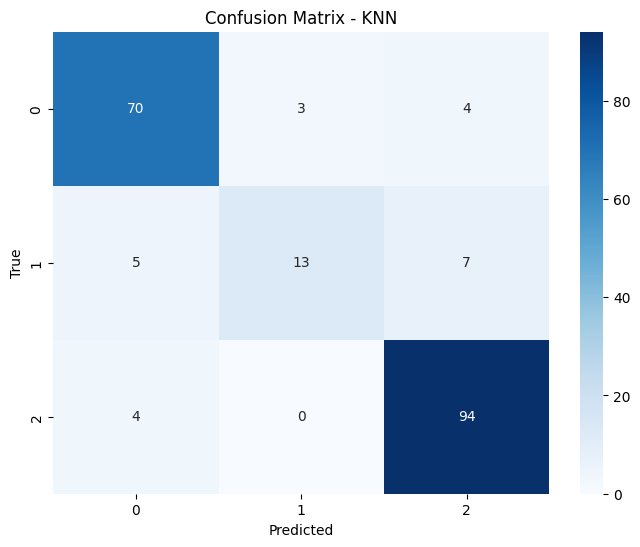


Best parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}

Cross-validation scores for KNN: [0.875   0.90625 0.9375  0.89375 0.93125]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Hyperparameter Tuning for KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("\nBest parameters for KNN:", grid_search_knn.best_params_)

# Cross-validation for KNN
from sklearn.model_selection import cross_val_score
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("\nCross-validation scores for KNN:", knn_cv_scores)

ARTIFICIAL NEURAL NETWORK (ANN)

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ANN Model
ann = MLPClassifier(hidden_layer_sizes=(150,), max_iter=2000, random_state=42)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)

# Evaluasi ANN
print("\nANN Model Evaluation:")
print(classification_report(y_test, ann_pred))


ANN Model Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        77
           1       0.87      0.52      0.65        25
           2       0.89      0.95      0.92        98

    accuracy                           0.88       200
   macro avg       0.88      0.79      0.82       200
weighted avg       0.88      0.88      0.87       200



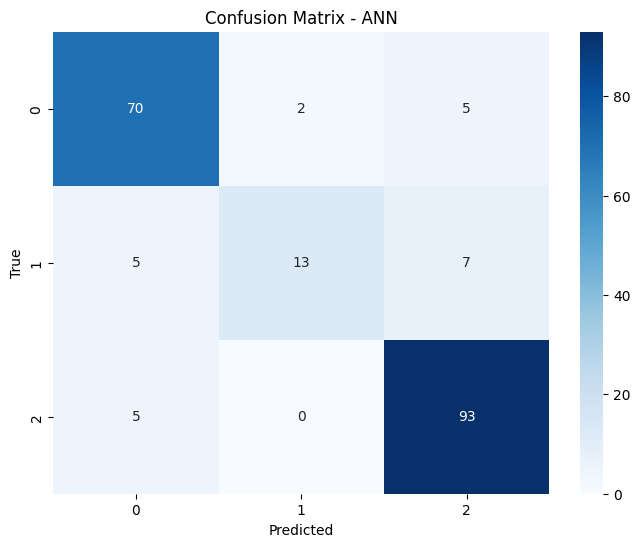


Best parameters for ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,)}

Cross-validation scores for ANN: [0.86875 0.90625 0.925   0.875   0.9375 ]


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score

# Confusion Matrix for ANN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Hyperparameter Tuning for ANN using GridSearchCV
param_grid_ann = {'hidden_layer_sizes': [(50,), (100,), (150,)], 'activation': ['relu', 'tanh']}
grid_search_ann = GridSearchCV(MLPClassifier(max_iter=2000, random_state=42), param_grid_ann, cv=5)
grid_search_ann.fit(X_train, y_train)
print("\nBest parameters for ANN:", grid_search_ann.best_params_)

# Cross-validation for ANN
ann_cv_scores = cross_val_score(ann, X_train, y_train, cv=5)
print("\nCross-validation scores for ANN:", ann_cv_scores)


MODEL DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model dengan parameter untuk mengurangi overfitting
dt = DecisionTreeClassifier(random_state=42, max_depth=100, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Evaluasi Decision Tree
print("\nDecision Tree Model Evaluation:")
print(classification_report(y_test, dt_pred))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.81      0.52      0.63        25
           2       0.91      0.96      0.94        98

    accuracy                           0.90       200
   macro avg       0.87      0.80      0.83       200
weighted avg       0.89      0.90      0.89       200



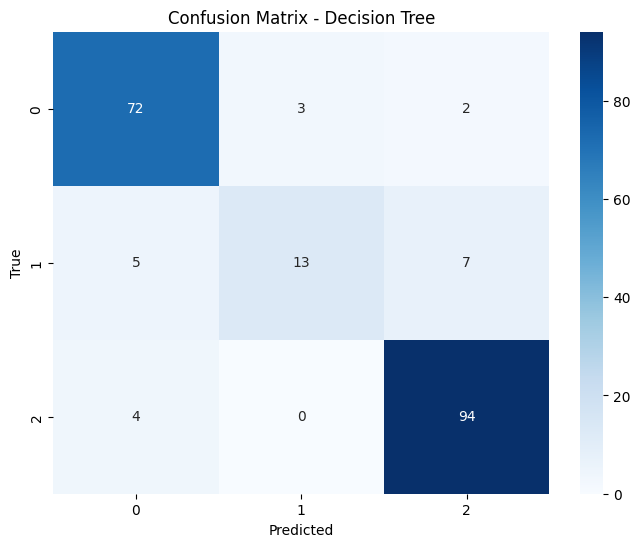


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}

Cross-validation scores for Decision Tree: [0.89375 0.8875  0.93125 0.90625 0.95   ]


In [39]:
from sklearn.model_selection import GridSearchCV

# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Hyperparameter Tuning for Decision Tree using GridSearchCV
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
print("\nCross-validation scores for Decision Tree:", dt_cv_scores)
